In [10]:
import numpy as np
import pint
import scipy.constants as const

ureg = pint.UnitRegistry()

In [15]:
def calculate_seebeck(epsilon_F, temperature, N0_V):
    """
    Calculate the Seebeck coefficient for a material.

    Parameters:
    epsilon_F (float): Fermi energy in Joules.
    N0_V (float): Charge carrier density per unit volume (in m^-3).
    temperature (float): Temperature in Kelvin at which the measurement is made.

    Returns:
    float: Seebeck coefficient in Volts per Kelvin.
    """

    q = const.e * ureg.C
    k_B = const.k * ureg.J / ureg.K

    S = (2 * np.log(2) * epsilon_F * k_B * N0_V) / (q * temperature)
    return S


In [33]:
def calculate_semi_quantum_seebeck_coefficient(epsilon_F, T):
    """
    Calculate the semi-quantum Seebeck coefficient.

    Parameters:
    epsilon_F (float): Fermi energy in Joules.
    T (float): Temperature in Kelvin.

    Returns:
    float: Semi-quantum Seebeck coefficient.
    """

    q = const.e * ureg.C
    k_B = const.k * ureg.J / ureg.K

    # Semi-quantum Seebeck coefficient calculation
    S_semi_quantum = -(np.pi / 6) * (k_B / q) * ((k_B * T) / epsilon_F)

    return S_semi_quantum

In [37]:
# http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/fermi.html

# Fermi energy in Joules
materials = {
 'Cu': {'N/V': 8.47e28, 'Fermi Energy (eV)': 7.00, 'Seebeck Coefficient (µV/K)': 6.5},
 'Ag': {'N/V': 5.86e28, 'Fermi Energy (eV)': 5.49, 'Seebeck Coefficient (µV/K)': 6.5},
 'Au': {'N/V': 5.90e28, 'Fermi Energy (eV)': 5.53, 'Seebeck Coefficient (µV/K)': 6.5},
 'Al': {'N/V': 18.1e28, 'Fermi Energy (eV)': 11.7, 'Seebeck Coefficient (µV/K)': 3.5},
 'Fe': {'N/V': 17.0e28, 'Fermi Energy (eV)': 11.1, 'Seebeck Coefficient (µV/K)': 19.0},
 'Cd': {'N/V': 9.27e28, 'Fermi Energy (eV)': 7.47, 'Seebeck Coefficient (µV/K)': 7.5},
 'Hg': {'N/V': 8.65e28, 'Fermi Energy (eV)': 7.13, 'Seebeck Coefficient (µV/K)': 0.6}
}

S_values = []
S_semi_quantum_values = []

for material, properties in materials.items():
    N0_V = properties['N/V'] * ureg.m**-3

    epsilon_F = properties['Fermi Energy (eV)'] * ureg.eV
    temperature = 300 * ureg.K

    S = calculate_semi_quantum_seebeck_coefficient(epsilon_F, temperature)
    S = S.to(ureg.microvolt/ureg.kelvin)
    S_values.append(S.magnitude)
    S_semi_quantum_values.append(properties['Seebeck Coefficient (µV/K)'])
    print(f"The Seebeck coefficient for {material} is {S}. The expected value is {properties['Seebeck Coefficient (µV/K)']:.1f} µV/K.")

The Seebeck coefficient for Cu is -0.16663553297779846 microvolt / kelvin. The expected value is 6.5 µV/K.
The Seebeck coefficient for Ag is -0.21246789268571753 microvolt / kelvin. The expected value is 6.5 µV/K.
The Seebeck coefficient for Au is -0.21093105440227652 microvolt / kelvin. The expected value is 6.5 µV/K.
The Seebeck coefficient for Al is -0.09969647272175977 microvolt / kelvin. The expected value is 3.5 µV/K.
The Seebeck coefficient for Fe is -0.10508547124726031 microvolt / kelvin. The expected value is 19.0 µV/K.
The Seebeck coefficient for Cd is -0.15615110185335868 microvolt / kelvin. The expected value is 7.5 µV/K.
The Seebeck coefficient for Hg is -0.1635972974536591 microvolt / kelvin. The expected value is 0.6 µV/K.


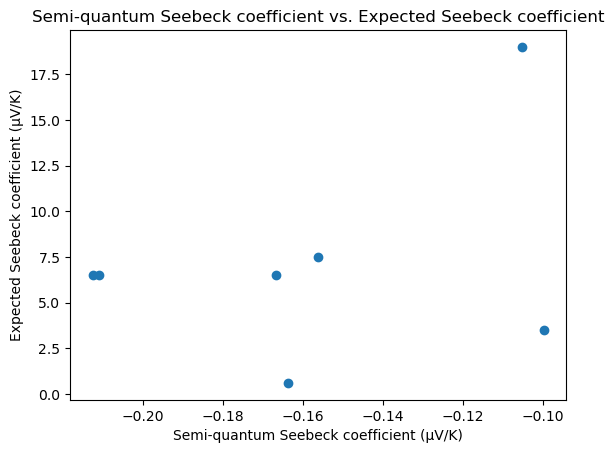

In [38]:
import matplotlib.pyplot as plt
plt.plot(S_values, S_semi_quantum_values, 'o')
plt.xlabel('Semi-quantum Seebeck coefficient (µV/K)')
plt.ylabel('Expected Seebeck coefficient (µV/K)')
plt.title('Semi-quantum Seebeck coefficient vs. Expected Seebeck coefficient')
plt.show()